In [2]:
import sys
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
feature_list_filename = "/Users/darylwilding-mcbride/Downloads/HeLa_20KInt/HeLa_20KInt-feature-list.csv"
feature_list_df = pd.read_csv(feature_list_filename)

In [5]:
feature_list_df.head()

,feature_id,charge_state,monoisotopic_mass,feature_centroid_scan,feature_centroid_rt,feature_centroid_mz,feature_start_rt,feature_end_rt,feature_scan_lower,feature_scan_upper,...,base_peak_scan_lower,base_peak_scan_upper,base_peak_centroid_rt,base_peak_std_dev_rt,base_peak_rt_lower,base_peak_rt_upper,base_peak_centroid_mz,base_peak_std_dev_mz,base_peak_mz_lower,base_peak_mz_upper
0,1,3,1960.915588,680.366484,4013.127018,654.717577,4005.957188,4021.318195,668,688,...,668,688,4013.130741,3.845270,4005.957188,4021.318195,654.645757,0.002612,654.619261,654.675743
1,2,2,1247.602054,574.224714,1085.766969,625.127677,1075.177570,1097.628037,565,585,...,565,585,1085.746282,2.179954,1075.177570,1097.628037,624.809083,0.002324,624.778556,624.833736
2,3,2,1789.900380,379.472823,4433.432999,896.216859,4421.919624,4439.635599,367,387,...,367,387,4436.255100,2.552869,4421.919624,4439.635599,896.459161,0.003005,896.413464,896.498444
3,4,2,1405.719333,527.432220,4034.358108,704.126734,4022.496117,4044.962866,519,539,...,519,539,4034.498268,3.537136,4024.859526,4044.962866,703.867085,0.005701,703.834050,703.900983
4,5,2,2214.082282,231.310785,5002.872698,1108.270682,4991.075059,5008.786578,221,241,...,221,241,5002.369948,1.875718,4991.075059,5008.786578,1108.049241,0.003916,1107.997794,1108.087022


In [6]:
feature_list_df['mono_peak_fwhm_scan_lower'] = feature_list_df.mono_peak_centroid_scan - (2.355/2*feature_list_df.mono_peak_std_dev_scan)
feature_list_df['mono_peak_fwhm_scan_upper'] = feature_list_df.mono_peak_centroid_scan + (2.355/2*feature_list_df.mono_peak_std_dev_scan)

In [7]:
feature_list_df['base_peak_fwhm_scan_lower'] = feature_list_df.base_peak_centroid_scan - (2.355/2*feature_list_df.base_peak_std_dev_scan)
feature_list_df['base_peak_fwhm_scan_upper'] = feature_list_df.base_peak_centroid_scan + (2.355/2*feature_list_df.base_peak_std_dev_scan)

In [8]:
feature_list_df[['base_peak_fwhm_scan_lower','base_peak_fwhm_scan_upper','base_peak_scan_lower','base_peak_scan_upper']].head()

,base_peak_fwhm_scan_lower,base_peak_fwhm_scan_upper,base_peak_scan_lower,base_peak_scan_upper
0,674.107077,686.941959,668,688
1,567.336306,580.910679,565,585
2,372.526575,387.271590,367,387
3,521.964807,534.363408,519,539
4,223.343388,237.734032,221,241


In [10]:
isolation_window_df = pd.read_csv("/Users/darylwilding-mcbride/Downloads/PasefFrameMsMsInfo.csv")

In [11]:
isolation_window_df.head()

,Frame,ScanNumBegin,ScanNumEnd,IsolationMz,IsolationWidth,CollisionEnergy,Precursor
0,3,507,532,742.744835,2.427448,36.96,1
1,3,549,574,709.235759,2.092358,36.96,2
2,3,602,627,594.235088,2.000000,36.96,3
3,3,643,668,503.527768,2.000000,36.96,4
4,3,684,709,552.063870,2.000000,31.92,5


In [12]:
frame_properties_df = pd.read_csv("/Users/darylwilding-mcbride/Downloads/frame_properties.csv")

In [13]:
frame_properties_df.head()

,frame_id,retention_time_secs
0,1,0.699237
1,2,0.801334
2,3,0.989283
3,4,1.096483
4,5,1.203557


In [14]:
isolation_window_df = pd.merge(isolation_window_df, frame_properties_df, how='left', left_on=['Frame'], right_on=['frame_id'])
isolation_window_df.drop(['frame_id', 'CollisionEnergy'], axis=1, inplace=True)

In [15]:
isolation_window_df.head(10)

,Frame,ScanNumBegin,ScanNumEnd,IsolationMz,IsolationWidth,Precursor,retention_time_secs
0,3,507,532,742.744835,2.427448,1,0.989283
1,3,549,574,709.235759,2.092358,2,0.989283
2,3,602,627,594.235088,2.000000,3,0.989283
3,3,643,668,503.527768,2.000000,4,0.989283
4,3,684,709,552.063870,2.000000,5,0.989283
5,3,765,790,416.202091,2.000000,6,0.989283
6,3,806,831,372.838373,2.000000,7,0.989283
7,3,868,893,367.323799,2.000000,8,0.989283
8,4,507,532,742.744835,2.427448,1,1.096483
9,4,568,593,598.471759,2.000000,9,1.096483


In [16]:
isolation_window_df['mz_lower'] = isolation_window_df.IsolationMz - (isolation_window_df.IsolationWidth / 2)
isolation_window_df['mz_upper'] = isolation_window_df.IsolationMz + (isolation_window_df.IsolationWidth / 2)

In [17]:
isolation_window_df.head(10)

,Frame,ScanNumBegin,ScanNumEnd,IsolationMz,IsolationWidth,Precursor,retention_time_secs,mz_lower,mz_upper
0,3,507,532,742.744835,2.427448,1,0.989283,741.531111,743.958559
1,3,549,574,709.235759,2.092358,2,0.989283,708.189580,710.281938
2,3,602,627,594.235088,2.000000,3,0.989283,593.235088,595.235088
3,3,643,668,503.527768,2.000000,4,0.989283,502.527768,504.527768
4,3,684,709,552.063870,2.000000,5,0.989283,551.063870,553.063870
5,3,765,790,416.202091,2.000000,6,0.989283,415.202091,417.202091
6,3,806,831,372.838373,2.000000,7,0.989283,371.838373,373.838373
7,3,868,893,367.323799,2.000000,8,0.989283,366.323799,368.323799
8,4,507,532,742.744835,2.427448,1,1.096483,741.531111,743.958559
9,4,568,593,598.471759,2.000000,9,1.096483,597.471759,599.471759


In [28]:
feature_id_of_interest = 7

In [29]:
feature = feature_list_df[feature_list_df.feature_id==feature_id_of_interest].iloc[0]

In [30]:
feature_id = feature.feature_id

In [31]:
# define the visualisation window
visualisation_mz_upper = feature.mono_peak_centroid_mz + 3
visualisation_mz_lower = feature.mono_peak_centroid_mz - 3
visualisation_scan_upper = feature.mono_peak_scan_upper + 20
visualisation_scan_lower = feature.mono_peak_scan_lower - 20
visualisation_rt_upper = feature.feature_end_rt
visualisation_rt_lower = feature.feature_start_rt

In [32]:
# find the isolation windows visible in the visualisation window
indexes = isolation_window_df.index[
                        (
                            ((isolation_window_df.mz_lower >= visualisation_mz_lower) &
                             (isolation_window_df.mz_lower <= visualisation_mz_upper)) |
                            ((isolation_window_df.mz_upper >= visualisation_mz_lower) &
                            (isolation_window_df.mz_upper <= visualisation_mz_upper))
                        ) &
                        (
                            ((isolation_window_df.ScanNumBegin >= visualisation_scan_lower) &
                             (isolation_window_df.ScanNumBegin <= visualisation_scan_upper)) |
                            ((isolation_window_df.ScanNumEnd >= visualisation_scan_lower) &
                            (isolation_window_df.ScanNumEnd <= visualisation_scan_upper))
                        ) &
                        (isolation_window_df.retention_time_secs >= visualisation_rt_lower) &
                        (isolation_window_df.retention_time_secs <= visualisation_rt_upper)
                       ]
isolation_windows_in_visualisation_area_df = isolation_window_df.loc[indexes]

In [43]:
isolation_windows_in_visualisation_area_df['frame_precursor'] = isolation_windows_in_visualisation_area_df['Frame'].map(str) + '|' + isolation_windows_in_visualisation_area_df['Precursor'].map(str)

In [44]:
isolation_windows_in_visualisation_area_df

,Frame,ScanNumBegin,ScanNumEnd,IsolationMz,IsolationWidth,Precursor,retention_time_secs,mz_lower,mz_upper,frame_precursor
302149,39372,364,389,893.416209,3.0,141925,4228.756323,891.916209,894.916209,39372|141925
302365,39394,329,354,894.968143,3.0,142046,4231.114676,893.468143,896.468143,39394|142046
302475,39405,329,354,894.969674,3.0,142101,4232.297594,893.469674,896.469674,39405|142101
302586,39416,331,356,894.971437,3.0,142150,4233.481248,893.471437,896.471437,39416|142150
302696,39428,329,354,894.424866,3.0,142214,4234.770135,892.924866,895.924866,39428|142214
302706,39429,329,354,894.424866,3.0,142214,4234.877793,892.924866,895.924866,39429|142214
302725,39431,329,354,894.424866,3.0,142214,4235.093620,892.924866,895.924866,39431|142214
302781,39438,339,364,896.488797,3.0,142267,4235.843633,894.988797,897.988797,39438|142267
302887,39449,359,384,894.977057,3.0,142329,4237.024377,893.477057,896.477057,39449|142329
302910,39451,345,370,894.335111,3.0,142346,4237.240996,892.835111,895.835111,39451|142346


In [45]:
# find all the features visible in the visualisation window
indexes = feature_list_df.index[
                        (feature_list_df.feature_centroid_mz >= visualisation_mz_lower) &
                        (feature_list_df.feature_centroid_mz <= visualisation_mz_upper) &
                        (feature_list_df.feature_scan_lower >= visualisation_scan_lower) &
                        (feature_list_df.feature_scan_upper <= visualisation_scan_upper) &
                        (feature_list_df.feature_start_rt >= visualisation_rt_lower) &
                        (feature_list_df.feature_end_rt <= visualisation_rt_upper)
                       ]
features_in_visualisation_area_df = feature_list_df.loc[indexes]

In [46]:
features_in_visualisation_area_df

,feature_id,charge_state,monoisotopic_mass,feature_centroid_scan,feature_centroid_rt,feature_centroid_mz,feature_start_rt,feature_end_rt,feature_scan_lower,feature_scan_upper,...,base_peak_rt_lower,base_peak_rt_upper,base_peak_centroid_mz,base_peak_std_dev_mz,base_peak_mz_lower,base_peak_mz_upper,mono_peak_fwhm_scan_lower,mono_peak_fwhm_scan_upper,base_peak_fwhm_scan_lower,base_peak_fwhm_scan_upper
6,7,2,1787.933540,337.025973,4238.194802,895.141155,4228.115199,4245.827357,327,347,...,4229.291499,4245.827357,894.973587,0.004276,894.926982,895.011891,328.858441,344.700043,328.858441,344.700043
177,179,2,1787.934590,343.616642,4238.437665,895.175969,4230.468480,4245.827357,332,351,...,4230.468480,4245.827357,894.973975,0.003950,894.936416,895.011891,338.684573,350.501761,338.684573,350.501761
3941,3948,2,1787.933857,334.441973,4239.935553,895.325791,4237.563074,4243.465041,327,344,...,4237.563074,4241.105441,894.972501,0.002726,894.964719,894.978870,327.910572,333.296287,327.910572,333.296287
24386,24496,2,1789.956556,347.830194,4237.689743,896.072707,4230.468480,4243.465041,340,355,...,4230.468480,4243.465041,895.985728,0.005948,895.936713,896.026389,343.027334,352.648926,343.027334,352.648926
33184,33359,2,1789.944364,336.344914,4236.335719,896.249098,4232.834532,4245.827357,329,343,...,4232.834532,4236.379314,895.980055,0.005771,895.941433,895.988630,334.574411,338.536247,334.574411,338.536247
94344,95281,2,1790.935816,317.891947,4237.000160,896.643890,4232.834532,4241.105441,308,327,...,4232.834532,4241.105441,896.475552,0.005030,896.437071,896.507887,312.926247,321.278981,312.926247,321.278981


In [47]:
feature_isolation_matches_df = pd.read_csv("/Users/darylwilding-mcbride/Downloads/HeLa_20KInt/HeLa_20KInt-feature-isolation-matches.csv")

In [50]:
feature_isolation_matches_df['frame_precursor'] = feature_isolation_matches_df['frame_id'].map(str) + '|' + feature_isolation_matches_df['precursor_id'].map(str)

In [51]:
matches_df = feature_isolation_matches_df[feature_isolation_matches_df.feature_id==feature_id_of_interest]

In [52]:
matches_df

,feature_id,frame_id,precursor_id,frame_precursor
32,7,39394,142046,39394|142046
33,7,39405,142101,39405|142101
34,7,39416,142150,39416|142150
35,7,39428,142214,39428|142214
36,7,39429,142214,39429|142214
37,7,39431,142214,39431|142214
38,7,39451,142346,39451|142346
39,7,39455,142346,39455|142346
40,7,39456,142346,39456|142346
41,7,39457,142346,39457|142346


In [69]:
# are there any matches not in the visualisation area?
matches_df[~matches_df.frame_precursor.isin(isolation_windows_in_visualisation_area_df.frame_precursor)]

,feature_id,frame_id,precursor_id,frame_precursor


In [53]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
# Rescale to values between 0 and 1 
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)

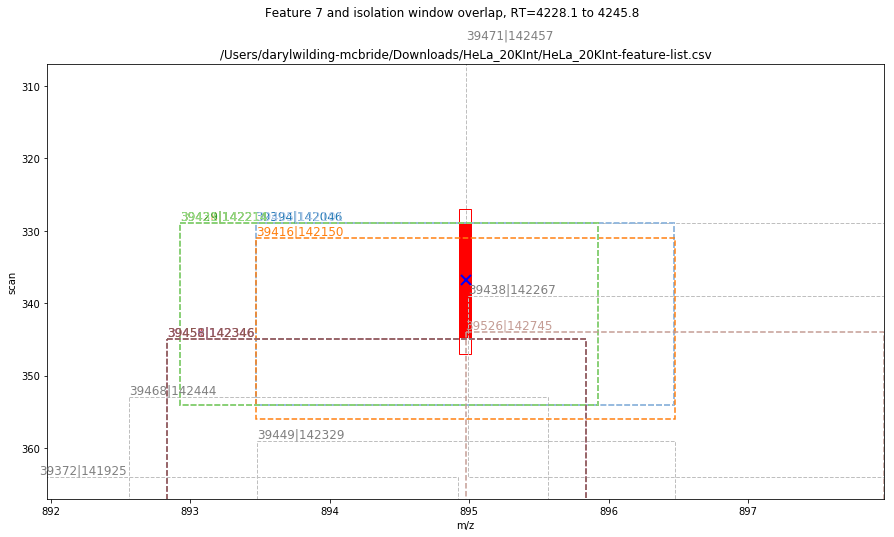

In [67]:
import matplotlib.patches as patches

f, ax1 = plt.subplots()
# add mono peak
mono_drift_range = feature.mono_peak_scan_upper-feature.mono_peak_scan_lower
mono_mz_range = feature.mono_peak_mz_upper-feature.mono_peak_mz_lower
mono_peak_rect = patches.Rectangle((feature.mono_peak_mz_lower,feature.mono_peak_scan_lower),mono_mz_range,mono_drift_range,linewidth=1,linestyle='-',edgecolor='r',facecolor='none', label='mono')
ax1.add_patch(mono_peak_rect)

# add the mono peak's centroid
plt.plot(feature.mono_peak_centroid_mz, feature.mono_peak_centroid_scan, 'bx', ms=10, mew=2, label='centroid')

# add mono peak's fwhm area
mono_fwhm_drift_range = feature.mono_peak_fwhm_scan_upper-feature.mono_peak_fwhm_scan_lower
mono_mz_range = feature.mono_peak_mz_upper-feature.mono_peak_mz_lower
mono_peak_fwhm_rect = patches.Rectangle((feature.mono_peak_mz_lower,feature.mono_peak_fwhm_scan_lower),mono_mz_range,mono_fwhm_drift_range,linewidth=1,linestyle='-',edgecolor='r',facecolor='r', label='mono')
ax1.add_patch(mono_peak_fwhm_rect)

# add base peak
# base_drift_range = feature.base_peak_scan_upper-feature.base_peak_scan_lower
# base_mz_range = feature.base_peak_mz_upper-feature.base_peak_mz_lower
# base_peak_rect = patches.Rectangle((feature.base_peak_mz_lower,feature.base_peak_scan_lower),base_mz_range,base_drift_range,linewidth=1,linestyle='-',edgecolor='r',facecolor='none', label='base')
# ax1.add_patch(base_peak_rect)

# add isolation windows not matched
isolation_windows_not_matched = isolation_windows_in_visualisation_area_df[~isolation_windows_in_visualisation_area_df.frame_precursor.isin(matches_df.frame_precursor)]
text_style = dict(size=12, color='gray')
for idx in range(len(isolation_windows_not_matched)):
    window = isolation_windows_not_matched.iloc[idx]
    drift_range = window.ScanNumEnd - window.ScanNumBegin
    mz_range = window.mz_upper - window.mz_lower
    isolation_window_rect = patches.Rectangle((window.mz_lower,window.ScanNumBegin),mz_range,drift_range,linewidth=1.0,linestyle='--',edgecolor='0.75',facecolor='none')
    ax1.add_patch(isolation_window_rect)
    ax1.text(window.mz_lower, window.ScanNumBegin-0.5, window.frame_precursor, **text_style)
    
# add isolation windows matched
isolation_windows_matched = isolation_windows_in_visualisation_area_df[isolation_windows_in_visualisation_area_df.frame_precursor.isin(matches_df.frame_precursor)]
for idx in range(len(isolation_windows_matched)):
    window = isolation_windows_matched.iloc[idx]
    drift_range = window.ScanNumEnd - window.ScanNumBegin
    mz_range = window.mz_upper - window.mz_lower
    isolation_window_rect = patches.Rectangle((window.mz_lower,window.ScanNumBegin),mz_range,drift_range,linewidth=1.5,linestyle='--',edgecolor=tableau20[idx%len(tableau20)],facecolor='none')
    ax1.add_patch(isolation_window_rect)
    text_style = dict(size=12, color=tableau20[idx%len(tableau20)])
    ax1.text(window.mz_lower, window.ScanNumBegin-0.5, window.frame_precursor, **text_style)
    
# add other features
# for idx in range(len(features_in_visualisation_area_df)):
#     of = features_in_visualisation_area_df.iloc[idx]
#     if of.feature_id != feature_id_of_interest:
#         mono_drift_range = of.mono_peak_scan_upper-of.mono_peak_scan_lower
#         mono_mz_range = of.mono_peak_mz_upper-of.mono_peak_mz_lower
#         mono_peak_rect = patches.Rectangle((of.mono_peak_mz_lower,of.mono_peak_scan_lower),mono_mz_range,mono_drift_range,linewidth=1,linestyle=':',edgecolor='b',facecolor='none', label='mono')
#         ax1.add_patch(mono_peak_rect)
    
f.set_figheight(8)
f.set_figwidth(15)
# plt.gca().invert_yaxis()
plt.gca().set_xlim([visualisation_mz_lower,visualisation_mz_upper])
plt.gca().set_ylim([visualisation_scan_upper,visualisation_scan_lower])
plt.xlabel('m/z')
plt.ylabel('scan')
# plt.legend(loc='best')
plt.margins(0.02)
plt.suptitle("Feature {} and isolation window overlap, RT={} to {}".format(feature_id_of_interest, round(feature.feature_start_rt,1), round(feature.feature_end_rt,1)))
plt.title('{}'.format(feature_list_filename))
plt.show()